In [1]:
import pandas as pd
from PIL import Image

%matplotlib inline 
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import normalize 
from PIL import Image
import numpy as np

# from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

In [3]:
# Reduce training size to 10000s for now

# drop_indices = np.random.choice(train.index, 30000, replace=False)
# train = train.drop(drop_indices)


In [4]:

X_train = train.iloc[:, 1:]
Y_train = train.iloc[:, 0]

# X_test = test.iloc[:, 1:]
# Y_test = test.iloc[:, 0]

# Train Test Split
Provided test set file doesn't have corresponding label  
Therefore, training set itself is split into training and testing sets!

Since we have a lot of features (748), using too many examples took
too long to train. 

So, I decided to use only about 8000 of them instead of 40000.

In [5]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8 )

## Data Visualization

Getting to know the data!

 y


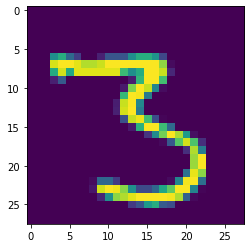

 n


In [6]:
# Produce an image

imgdata = X_train.values

imgdata = imgdata
i = 0

while (input() != "n"):
    i += 1
    img = imgdata[i][:].reshape((28,28))
#     print(img)
#     img = Image.fromarray(img, mode="L")
#      img.resize((12,12))
    
#     img = np.array(img)

    plt.imshow(img)
    plt.show()

In [7]:
# re-scale features

X_train = X_train/255
X_test = X_test/255

In [8]:
# Train a SVM
model = SVC(C = 1, gamma='auto', verbose=5)

# fit
model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

(8400,)
[LibSVM]

## Performance Metrics

In [10]:
# Confusion matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[3236,    0,   12,    5,    5,   29,   24,    4,   17,    2],
       [   0, 3627,   13,   16,    3,   15,    6,    5,   15,    5],
       [  20,   32, 3000,   33,   45,   13,   55,   59,   96,   14],
       [   7,   34,   58, 3073,    1,  144,   17,   35,   76,   19],
       [   6,   22,   30,    0, 2991,    4,   29,   10,    8,  199],
       [  18,   66,   15,  119,   22, 2678,   55,    6,   27,   20],
       [  20,   18,   26,    2,   19,   41, 3204,    0,    8,    0],
       [  13,   47,   40,    6,   41,    6,    1, 3163,    5,  132],
       [  14,   82,   21,   98,   18,  111,   24,   14, 2807,   54],
       [  25,   20,   15,   57,  100,   22,    1,  112,   29, 2989]])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

0.9157142857142857